In [34]:
!pip install prophet

In [35]:
from prophet import Prophet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
#Data preparation
df=pd.read_csv('rossmann_train.csv',low_memory=False)

In [37]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


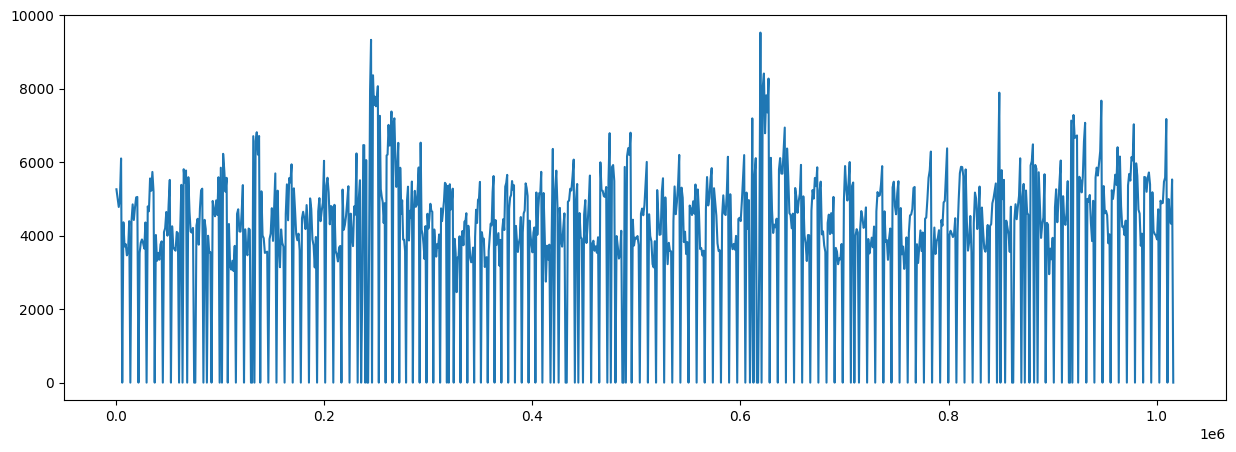

In [38]:
#We will consider only the sales of store 1.
df[df['Store']==1]['Sales'].plot(figsize=(15,5));

In [39]:
(df[df['Store']==1]['Sales']==0).sum()

161

In [40]:
store1=df[df['Store']==1].copy()

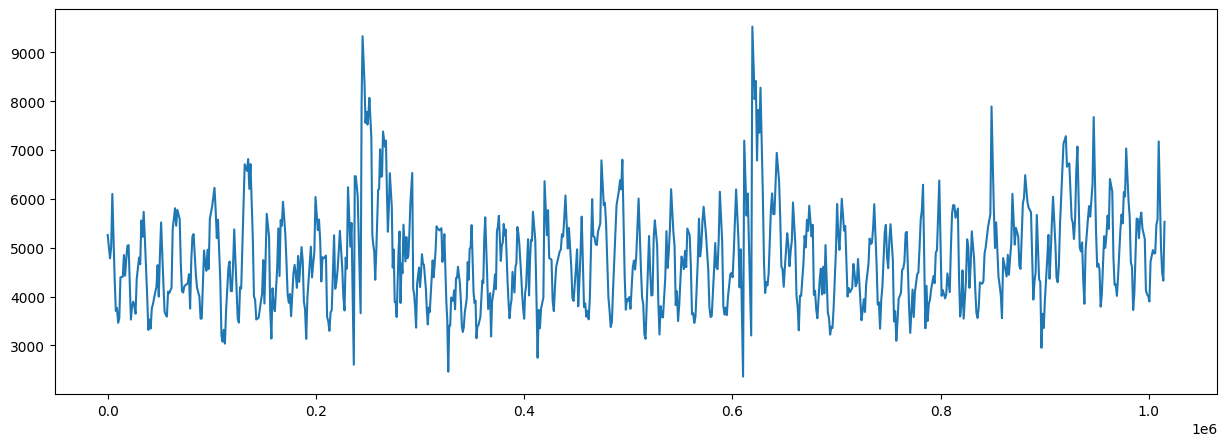

In [41]:
#Doing this because we already know the sales when the store is closed i.e 0.
store1[store1['Open']>0]['Sales'].plot(figsize=(15,5));

In [42]:
store1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
2230,1,3,2015-07-29,4782,523,1,1,0,1
3345,1,2,2015-07-28,5011,560,1,1,0,1
4460,1,1,2015-07-27,6102,612,1,1,0,1


In [43]:
store1['Date']=pd.to_datetime(store1['Date'])

In [44]:
store1.set_index('Date',inplace=True)

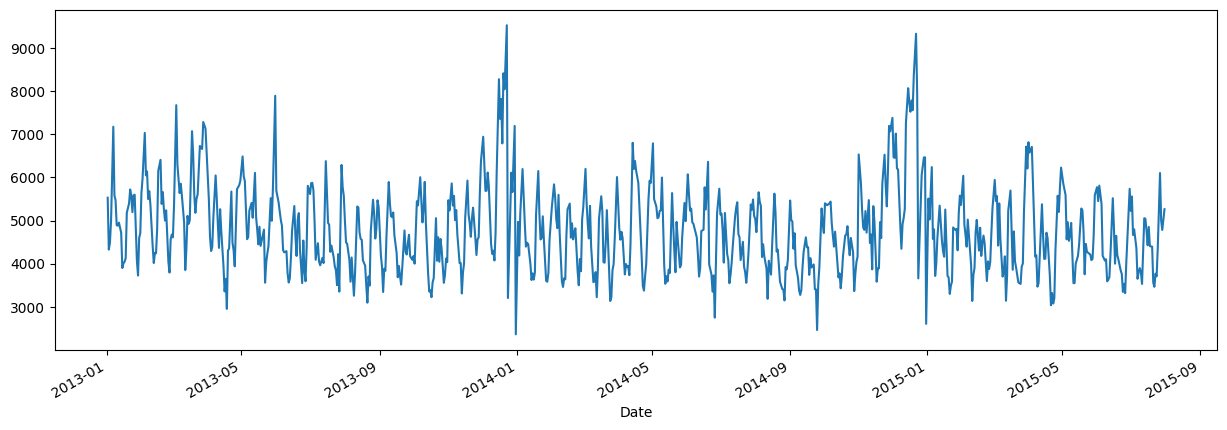

In [45]:
store1[store1['Customers'] > 0]['Sales'].plot(figsize=(15, 5));

In [46]:
df_p = store1[['Sales']].copy()
df_p['Date'] = df_p.index

In [47]:
#To sort dates in chronological order
df_p.sort_index(inplace=True)

In [48]:
#Renaming columns for prophet input
df_p.columns=['y','ds']

In [49]:
df_p.head()

,y,ds
Date,,
2013-01-01,0,2013-01-01
2013-01-02,5530,2013-01-02
2013-01-03,4327,2013-01-03
2013-01-04,4486,2013-01-04
2013-01-05,4997,2013-01-05


In [50]:
#Using Prophet
m=Prophet()

In [51]:
m.fit(df_p)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/2_722a28.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/k3j3s5yr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63562', 'data', 'file=/tmp/tmpxob09ywd/2_722a28.json', 'init=/tmp/tmpxob09ywd/k3j3s5yr.json', 'output', 'file=/tmp/tmpxob09ywd/prophet_modelky_n3h0o/prophet_model-20230918090417.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:04:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:04:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [52]:
#Creating dataframe for predictions
future=m.make_future_dataframe(periods=365)

In [53]:
forecast=m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,4240.798464,3447.902348,6259.193418,4240.798464,4240.798464,612.395459,612.395459,612.395459,706.298036,706.298036,706.298036,-93.902576,-93.902576,-93.902576,0.0,0.0,0.0,4853.193923
1,2013-01-02,4239.991566,3076.146031,6126.153209,4239.991566,4239.991566,354.396511,354.396511,354.396511,510.531755,510.531755,510.531755,-156.135244,-156.135244,-156.135244,0.0,0.0,0.0,4594.388077
2,2013-01-03,4239.184668,2729.421712,5734.457098,4239.184668,4239.184668,-57.851943,-57.851943,-57.851943,151.282726,151.282726,151.282726,-209.134669,-209.134669,-209.134669,0.0,0.0,0.0,4181.332724
3,2013-01-04,4238.377770,3144.067384,5899.878689,4238.377770,4238.377770,321.069703,321.069703,321.069703,573.644023,573.644023,573.644023,-252.574320,-252.574320,-252.574320,0.0,0.0,0.0,4559.447472
4,2013-01-05,4237.570872,3549.716323,6402.856652,4237.570872,4237.570872,712.758340,712.758340,712.758340,999.065929,999.065929,999.065929,-286.307589,-286.307589,-286.307589,0.0,0.0,0.0,4950.329212


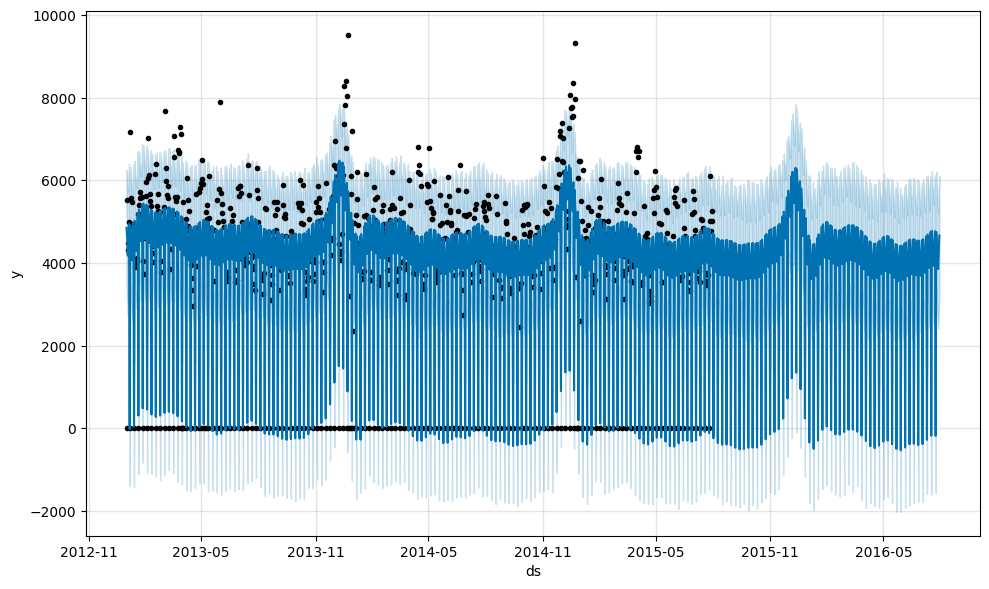

In [54]:
m.plot(forecast);
#Black dots are the original time series
#Thick Blue lines are our prediction
#Some terms are below zero which means that the model reuqires some intervention

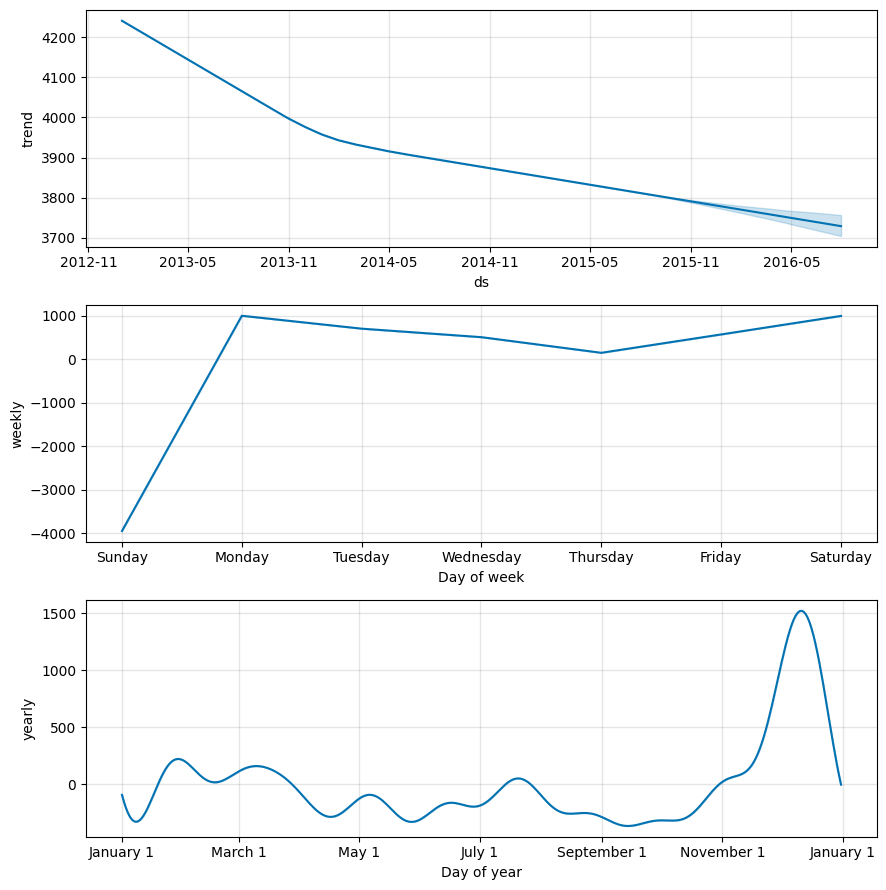

In [55]:
m.plot_components(forecast);

### MODELLING OPEN DAYS ONLY FOR BETTER PREDICTION INTERVAL

In [56]:
df_p2 = store1[store1['Open'] > 0][['Sales']].copy()
df_p2['Date'] = df_p2.index
df_p2.head()

,Sales,Date
Date,,
2015-07-31,5263,2015-07-31
2015-07-30,5020,2015-07-30
2015-07-29,4782,2015-07-29
2015-07-28,5011,2015-07-28
2015-07-27,6102,2015-07-27


In [57]:
df_p2.columns = ['y', 'ds']

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/p9y13hs7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/yggfu67g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45678', 'data', 'file=/tmp/tmpxob09ywd/p9y13hs7.json', 'init=/tmp/tmpxob09ywd/yggfu67g.json', 'output', 'file=/tmp/tmpxob09ywd/prophet_modelg_yq5vyw/prophet_model-20230918090728.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:07:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:07:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


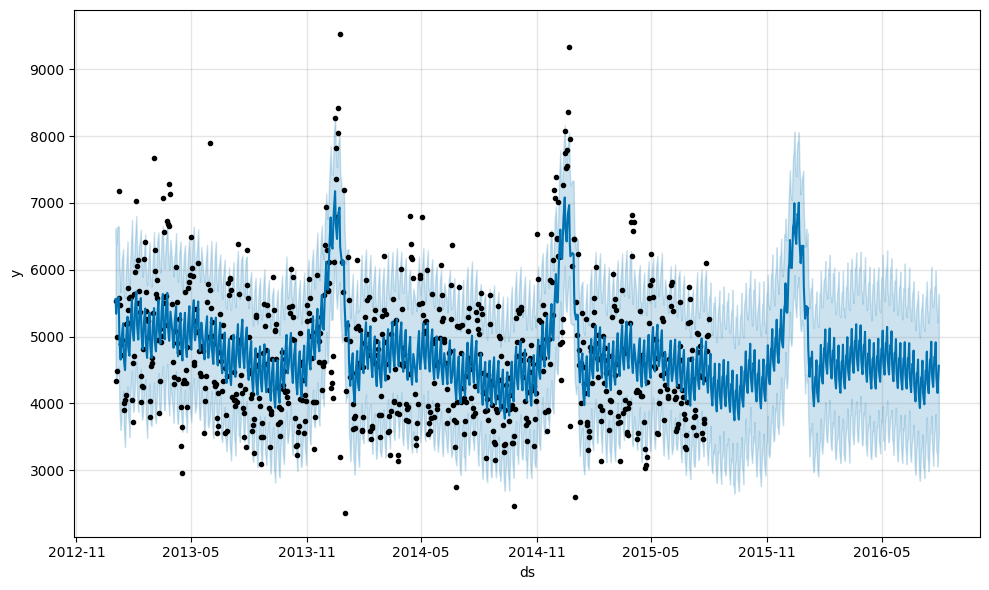

In [58]:
m2 = Prophet()
m2.fit(df_p2)
future2 = m2.make_future_dataframe(periods=365)
forecast2 = m2.predict(future2)
m2.plot(forecast2);
#Ignore predictions of sundays while analysing as the model is continuous and we know that the sales are 0.

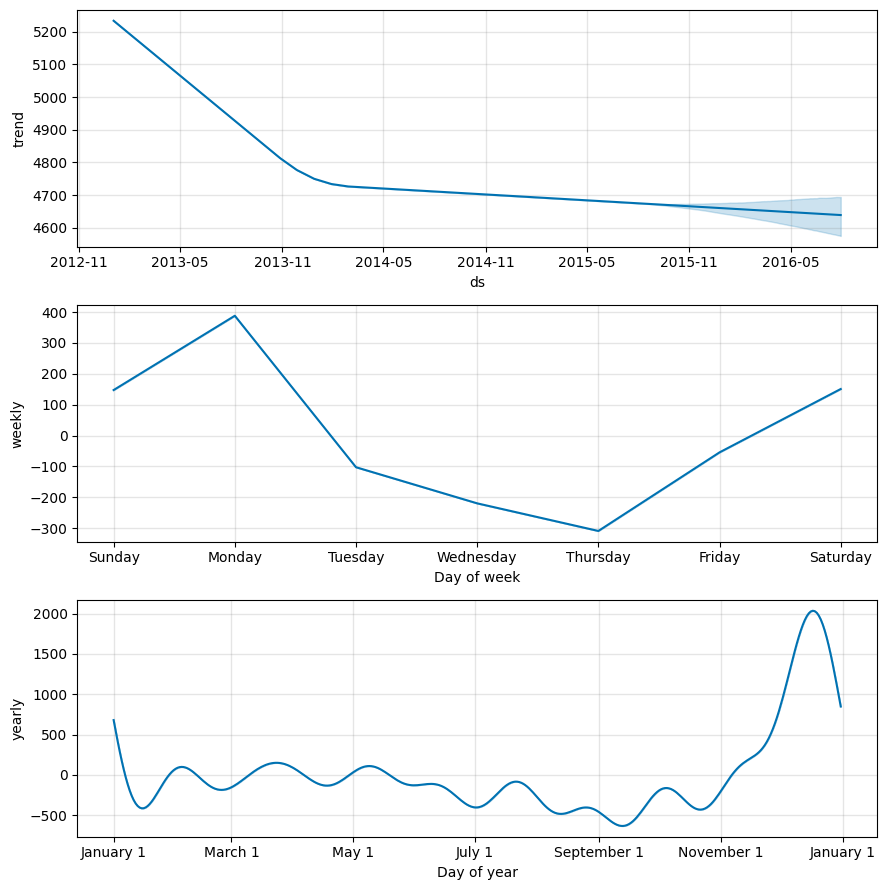

In [59]:
m2.plot_components(forecast2);
#We can see the interpolation of sales on Sundays(Store is closed)

### ADDING HOLIDAYS

In [60]:
m3 = Prophet()
m3.add_country_holidays(country_name='US')

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/cii2z9r0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/pyd_bta_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13448', 'data', 'file=/tmp/tmpxob09ywd/cii2z9r0.json', 'init=/tmp/tmpxob09ywd/pyd_bta_.json', 'output', 'file=/tmp/tmpxob09ywd/prophet_modeltrhuzb1u/prophet_model-20230918091459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:14:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:14:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


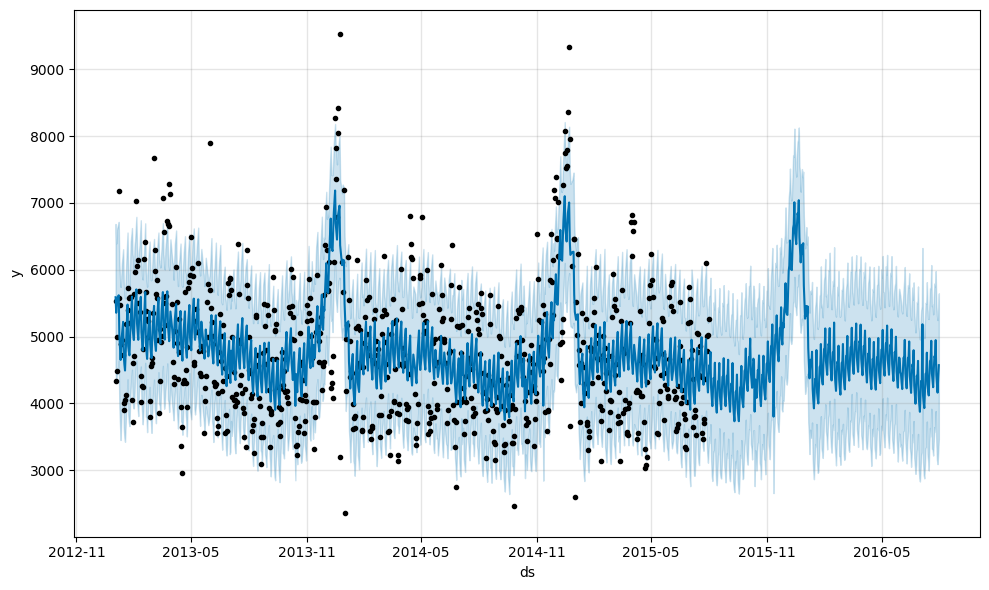

In [61]:
m3.fit(df_p2)
future3 = m3.make_future_dataframe(periods=365)
forecast3 = m3.predict(future3)
m3.plot(forecast3);

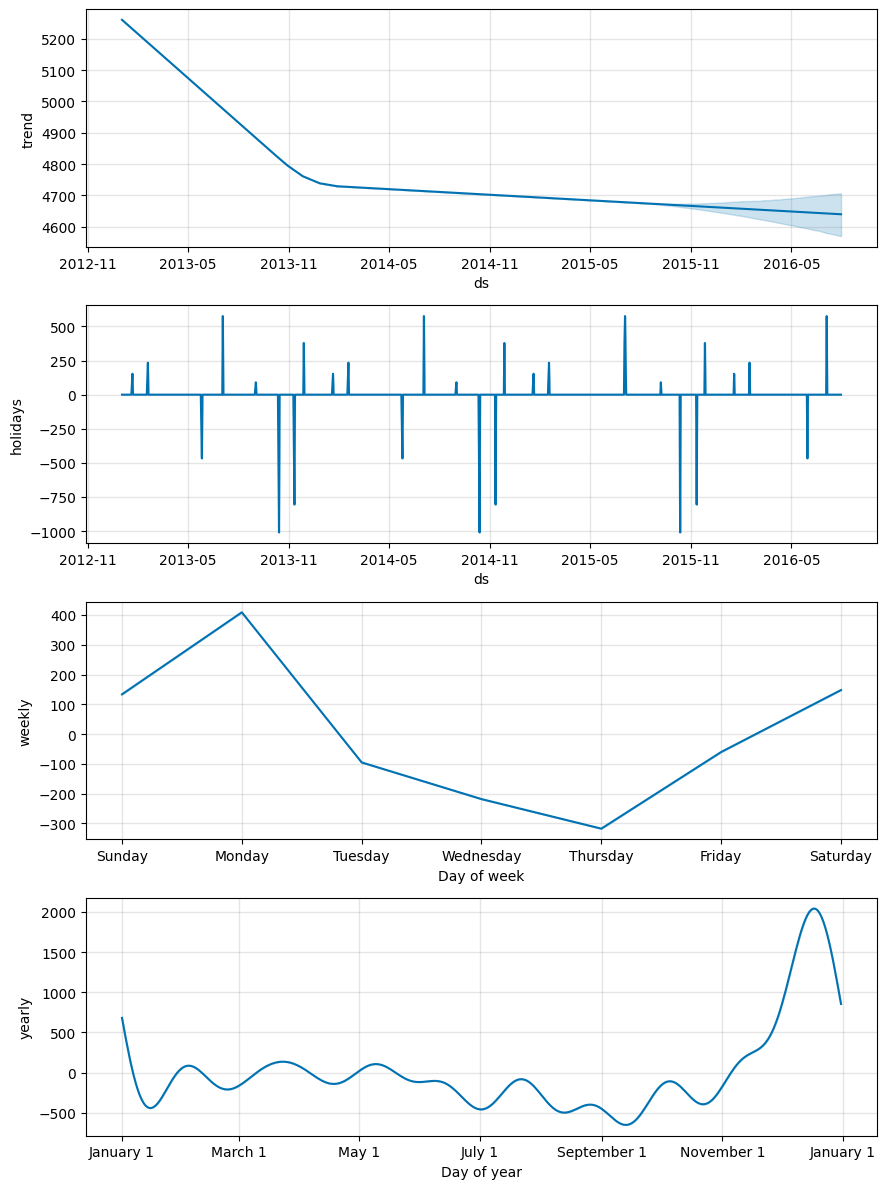

In [62]:
m3.plot_components(forecast3);

### ADDING EXOGENOUS REGRESSORS

In [67]:
df_p['open'] = store1['Open']
df_p['promo'] = store1['Promo']
df_p[['SH1', 'SH2', 'SH3']] = pd.get_dummies(
    store1['StateHoliday'], drop_first=True)
#Dummy encoding the letters in state holidays and dropping the no holiday element.
df_p['SchoolHoliday'] = store1['SchoolHoliday']
df_p.head()

,y,ds,open,promo,SH1,SH2,SH3,SchoolHoliday
Date,,,,,,,,
2013-01-01,0,2013-01-01,0,0,1,0,0,1
2013-01-02,5530,2013-01-02,1,0,0,0,0,1
2013-01-03,4327,2013-01-03,1,0,0,0,0,1
2013-01-04,4486,2013-01-04,1,0,0,0,0,1
2013-01-05,4997,2013-01-05,1,0,0,0,0,1


In [68]:
m4 = Prophet()
m4.add_regressor('open', mode='multiplicative')
m4.add_regressor('promo', mode='additive')
m4.add_regressor('SH1', mode='additive')
m4.add_regressor('SH2', mode='additive')
m4.add_regressor('SH3', mode='additive')
m4.add_regressor('SchoolHoliday', mode='additive')
m4.fit(df_p)
#How regressors are to be incorporated is specified via the optional arg mode.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/l7cqan66.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/a05szwhm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4038', 'data', 'file=/tmp/tmpxob09ywd/l7cqan66.json', 'init=/tmp/tmpxob09ywd/a05szwhm.json', 'output', 'file=/tmp/tmpxob09ywd/prophet_modelyn9gw805/prophet_model-20230918093812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:38:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:38:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [69]:
future4 = m4.make_future_dataframe(periods=365)

In [70]:
train_idx = future4['ds'].isin(df_p.index)
test_idx = ~train_idx

In [71]:
regressors = ['open', 'promo', 'SH1', 'SH2', 'SH3', 'SchoolHoliday']
for r in regressors:
  future4.loc[train_idx, r] = df_p[r].to_list()
#Add training values of regressors in the future dataframe.

In [72]:
#Add test values of the regressors in the dataframe
future4.loc[test_idx, 'open'] = \
  future4.loc[test_idx, 'ds'].apply(lambda x: 1.0 * (x.weekday() != 6))

for r in regressors[1:]:
  future4.loc[test_idx, r] = \
    df_p.iloc[-365:][r].to_list()

In [73]:
future4.tail(10)

,ds,open,promo,SH1,SH2,SH3,SchoolHoliday
1297,2016-07-21,1.0,0.0,0.0,0.0,0.0,0.0
1298,2016-07-22,1.0,0.0,0.0,0.0,0.0,0.0
1299,2016-07-23,1.0,0.0,0.0,0.0,0.0,0.0
1300,2016-07-24,0.0,0.0,0.0,0.0,0.0,0.0
1301,2016-07-25,1.0,0.0,0.0,0.0,0.0,0.0
1302,2016-07-26,1.0,1.0,0.0,0.0,0.0,1.0
1303,2016-07-27,1.0,1.0,0.0,0.0,0.0,1.0
1304,2016-07-28,1.0,1.0,0.0,0.0,0.0,1.0
1305,2016-07-29,1.0,1.0,0.0,0.0,0.0,1.0
1306,2016-07-30,1.0,1.0,0.0,0.0,0.0,1.0


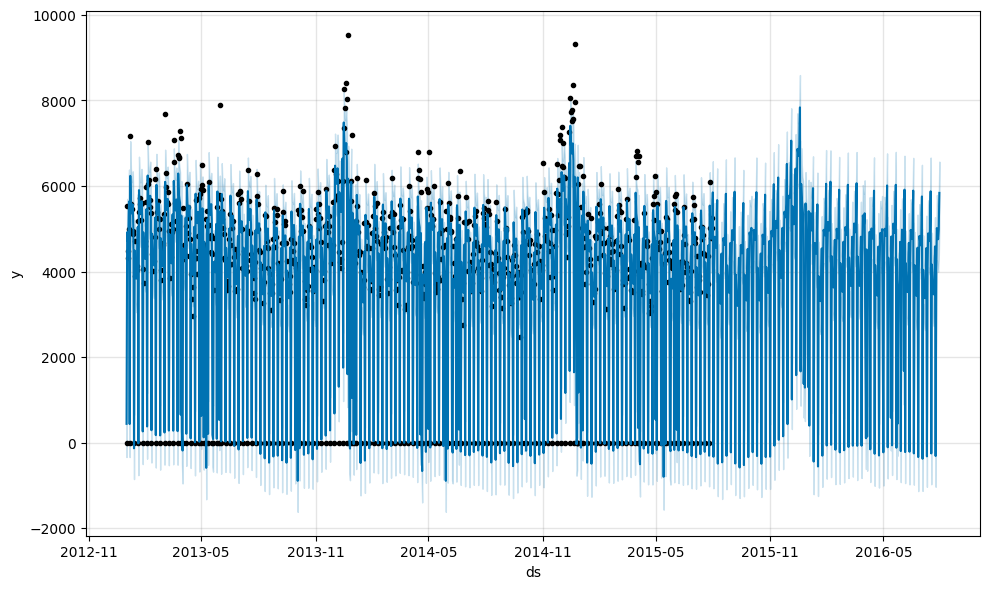

In [74]:
forecast4 = m4.predict(future4)
m4.plot(forecast4);
#We used the mode multiplicative for open so that the model could figure out to multiply by 0 when the store is closed.But it does not learn this as demonstrated by the graph below.Best to simply remove them.Also the predicitons intervals as a result will not include 0.

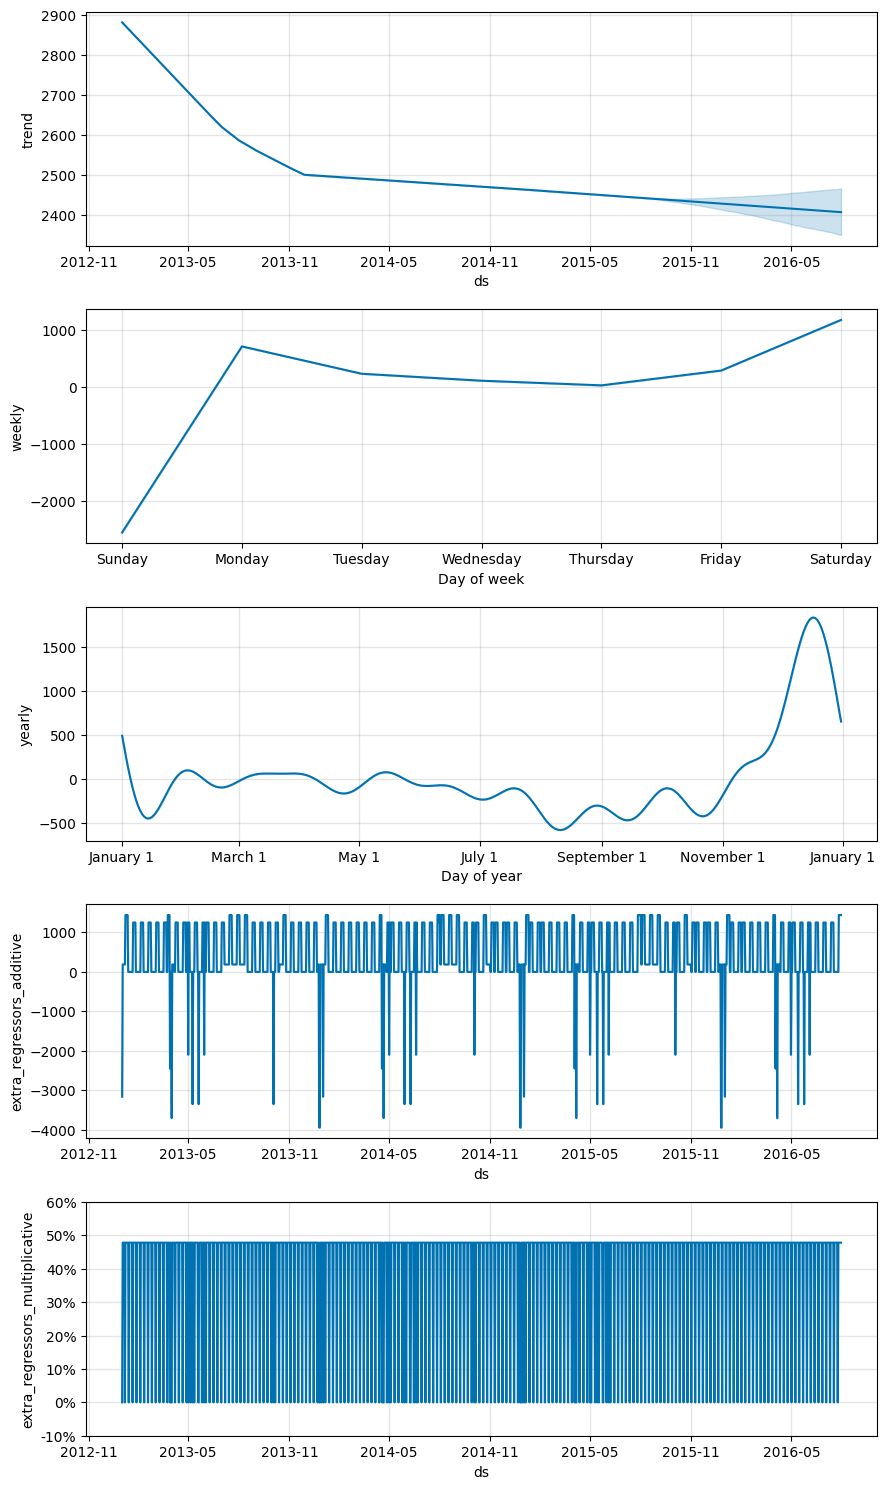

In [75]:
m4.plot_components(forecast4);

### WALK FORWARD CROSS-VALIDATION

In [76]:
from prophet.diagnostics import cross_validation

In [78]:
df_cv = cross_validation(
    m,
    initial='730 days',
    period='30 days',
    horizon='60 days')

INFO:prophet:Making 6 forecasts with cutoffs between 2015-01-02 00:00:00 and 2015-06-01 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/v501cgwv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/mvwhjlk3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67526', 'data', 'file=/tmp/tmpxob09ywd/v501cgwv.json', 'init=/tmp/tmpxob09ywd/mvwhjlk3.json', 'output', 'file=/tmp/tmpxob09ywd/prophet_modelffjzxild/prophet_model-20230918095158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:51:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:51:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/bsrmedi8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/j4g2kjc0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [79]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-03,4608.289681,3233.622449,6078.401309,5023,2015-01-02
1,2015-01-04,-445.550548,-1960.159048,1011.578929,0,2015-01-02
2,2015-01-05,4571.201302,2977.333968,5922.706929,6239,2015-01-02
3,2015-01-06,4186.760885,2771.635411,5776.795244,4574,2015-01-02
4,2015-01-07,3949.021942,2457.749171,5388.747054,4796,2015-01-02
...,...,...,...,...,...,...
355,2015-07-27,4773.335144,3276.410847,6263.747815,6102,2015-06-01
356,2015-07-28,4448.661219,2975.920017,5893.042918,5011,2015-06-01
357,2015-07-29,4234.084441,2796.482910,5590.946431,4782,2015-06-01
358,2015-07-30,3858.515391,2342.183675,5216.960193,5020,2015-06-01


In [80]:
from prophet.diagnostics import performance_metrics
pm = performance_metrics(df_cv)
pm
#defult window size is at 10% and horizon =60 days

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,6 days,2.222793e+06,1490.903436,920.421266,0.137957,0.550481,0.805556
1,7 days,1.587479e+06,1259.951824,759.027734,0.132260,0.491753,0.833333
2,8 days,1.460648e+06,1208.572593,705.468425,0.124084,0.486157,0.888889
3,9 days,1.167144e+06,1080.344591,690.078243,0.144806,0.453722,0.916667
4,10 days,5.060986e+05,711.406086,578.755228,0.153836,0.460164,0.944444
5,11 days,4.973497e+05,705.230258,569.664156,0.146121,0.403334,0.944444
6,12 days,8.566679e+05,925.563584,633.093741,0.146121,0.450098,0.944444
7,13 days,8.260868e+05,908.893157,604.759927,0.135763,0.441473,0.944444
8,14 days,7.819839e+05,884.298555,566.394472,0.123911,0.432889,0.944444
9,15 days,6.555906e+05,809.685502,498.259309,0.102864,0.414538,0.972222


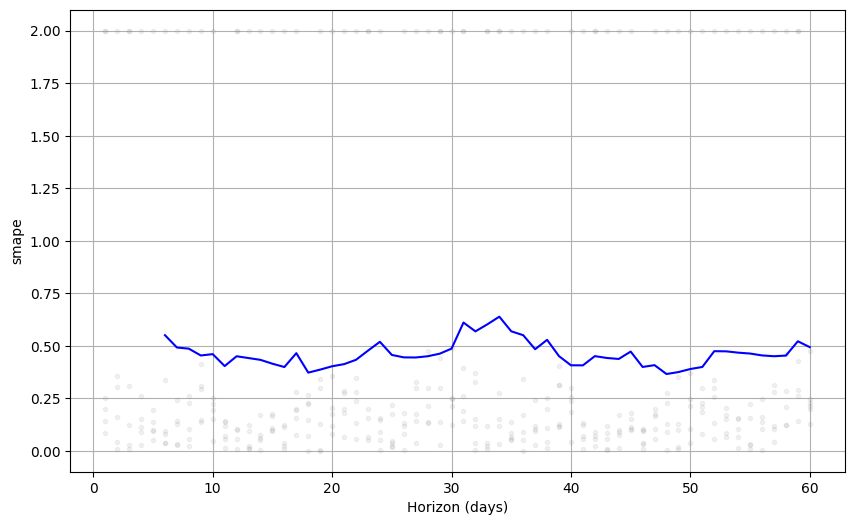

In [81]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='smape');

In [82]:
df_cv2 = cross_validation(
    m2,
    initial='730 days',
    period='30 days',
    horizon='60 days')

INFO:prophet:Making 6 forecasts with cutoffs between 2015-01-02 00:00:00 and 2015-06-01 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/vf3k4s65.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/6byniuoh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67144', 'data', 'file=/tmp/tmpxob09ywd/vf3k4s65.json', 'init=/tmp/tmpxob09ywd/6byniuoh.json', 'output', 'file=/tmp/tmpxob09ywd/prophet_model3kimrmv8/prophet_model-20230918095543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:55:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:55:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/zo530ejn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/n_jhm954.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

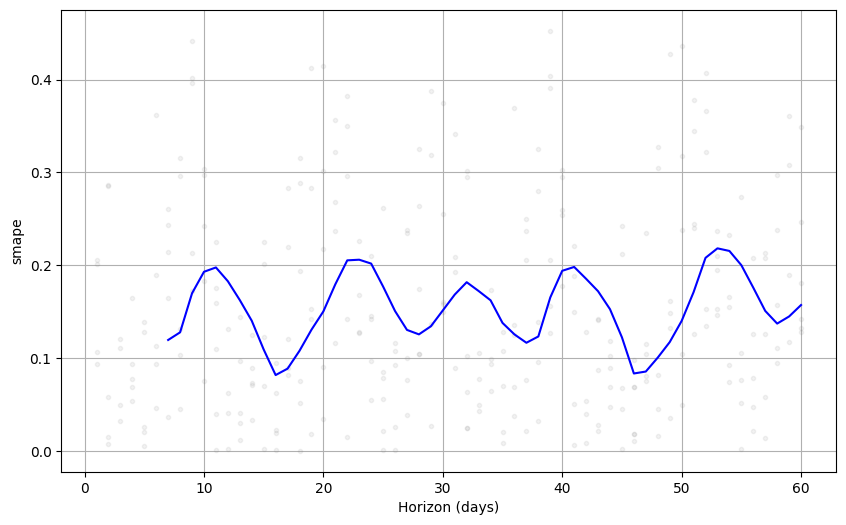

In [83]:
pm2 = performance_metrics(df_cv2)
plot_cross_validation_metric(df_cv2, metric='smape');

In [84]:
df_cv3 = cross_validation(
    m3,
    initial='730 days',
    period='30 days',
    horizon='60 days')
pm3 = performance_metrics(df_cv3)

INFO:prophet:Making 6 forecasts with cutoffs between 2015-01-02 00:00:00 and 2015-06-01 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/i9atzh8l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/k688p_cj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57110', 'data', 'file=/tmp/tmpxob09ywd/i9atzh8l.json', 'init=/tmp/tmpxob09ywd/k688p_cj.json', 'output', 'file=/tmp/tmpxob09ywd/prophet_model7ilv3w3b/prophet_model-20230918095645.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:56:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:56:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/vkqi4md_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/lw5dq60a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

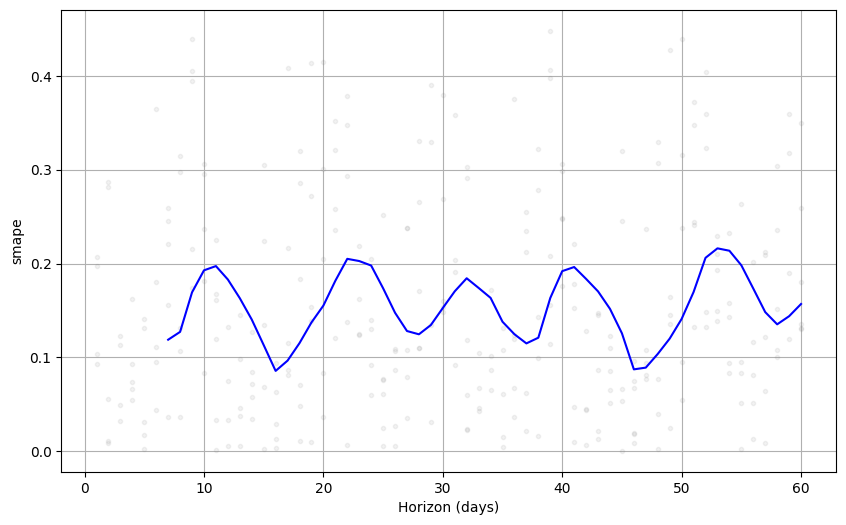

In [85]:
plot_cross_validation_metric(df_cv3, metric='smape');

In [86]:
df_cv4 = cross_validation(
    m4,
    initial='730 days',
    period='30 days',
    horizon='60 days')
pm4 = performance_metrics(df_cv4)

INFO:prophet:Making 6 forecasts with cutoffs between 2015-01-02 00:00:00 and 2015-06-01 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/0j4fhfrj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/66zvnrh_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44007', 'data', 'file=/tmp/tmpxob09ywd/0j4fhfrj.json', 'init=/tmp/tmpxob09ywd/66zvnrh_.json', 'output', 'file=/tmp/tmpxob09ywd/prophet_modelocf4e1hb/prophet_model-20230918095741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:57:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:57:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/8f0yug7g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/j4_my9y5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

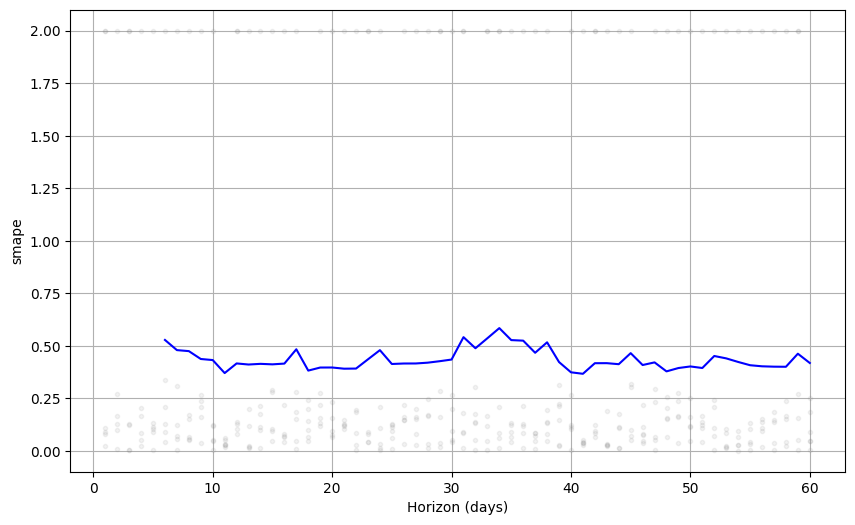

In [87]:
plot_cross_validation_metric(df_cv4, metric='smape');

In [88]:
pm['smape'].mean(), pm2['smape'].mean(), pm3['smape'].mean(), pm4['smape'].mean()

(0.46176331861248626,
 0.153789143941513,
 0.15400986622103202,
 0.435715123532803)

### CHANGEPOINT DETECTION

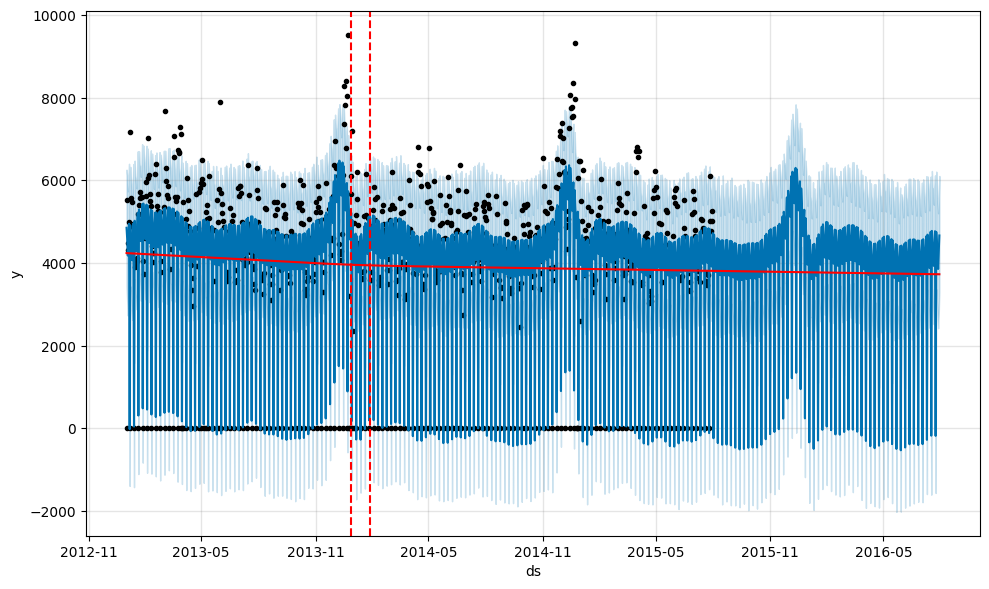

In [90]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

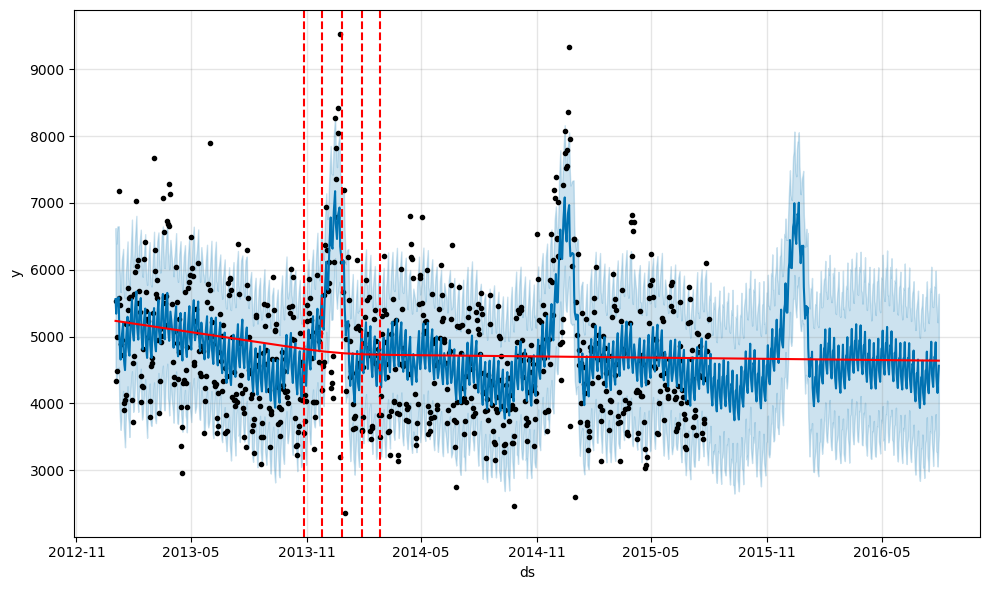

In [91]:
fig = m2.plot(forecast2)
a = add_changepoints_to_plot(fig.gca(), m2, forecast2)

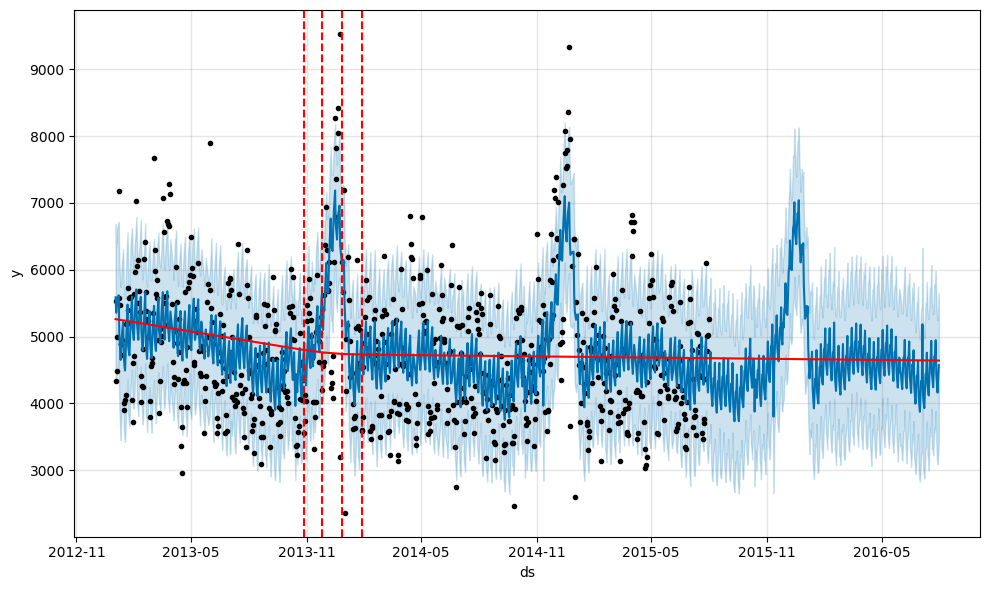

In [92]:
fig = m3.plot(forecast3)
a = add_changepoints_to_plot(fig.gca(), m3, forecast3)

If the trend changes are being overfit (too much flexibility) or underfit (not enough flexibility), you can adjust the strength of the sparse prior using the input argument changepoint_prior_scale. By default, this parameter is set to 0.05. Increasing it will make the trend more flexible

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/ng0t65qa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/10dbg0d6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42658', 'data', 'file=/tmp/tmpxob09ywd/ng0t65qa.json', 'init=/tmp/tmpxob09ywd/10dbg0d6.json', 'output', 'file=/tmp/tmpxob09ywd/prophet_modelr65jofqm/prophet_model-20230918100244.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:02:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:02:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


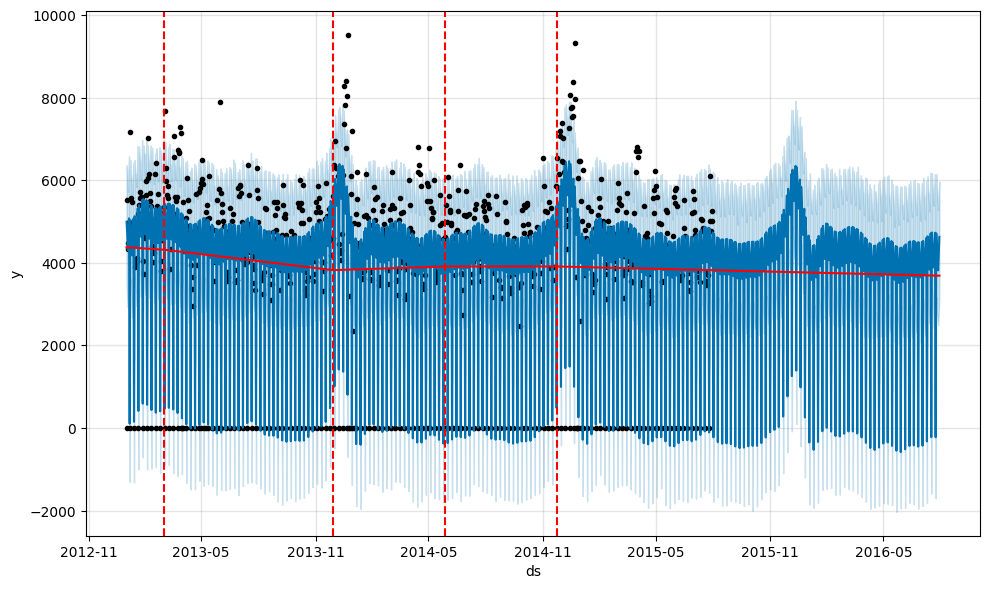

In [93]:
m_a = Prophet(changepoint_prior_scale=0.5)
forecast_a = m_a.fit(df_p).predict(future)
fig = m_a.plot(forecast_a)
a = add_changepoints_to_plot(fig.gca(), m_a, forecast_a)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/6b4hntr3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/cywfauz3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75021', 'data', 'file=/tmp/tmpxob09ywd/6b4hntr3.json', 'init=/tmp/tmpxob09ywd/cywfauz3.json', 'output', 'file=/tmp/tmpxob09ywd/prophet_model28rppzap/prophet_model-20230918100302.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:03:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:03:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


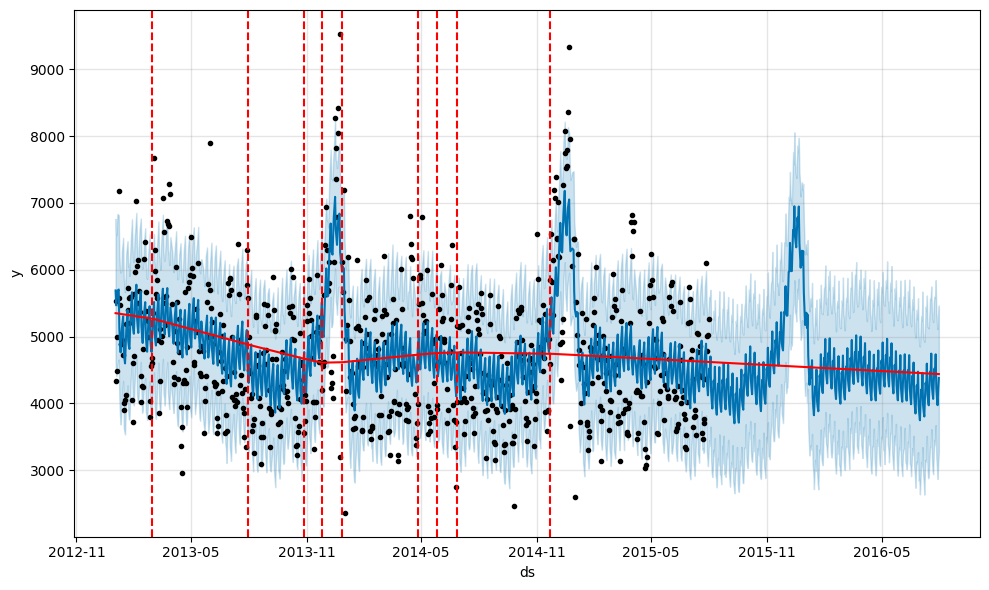

In [94]:
m2_a = Prophet(changepoint_prior_scale=0.5)
forecast2_a = m2_a.fit(df_p2).predict(future2)
fig = m2_a.plot(forecast2_a)
a = add_changepoints_to_plot(fig.gca(), m2_a, forecast2_a)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/ep6kkse9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxob09ywd/zc_t34r4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53784', 'data', 'file=/tmp/tmpxob09ywd/ep6kkse9.json', 'init=/tmp/tmpxob09ywd/zc_t34r4.json', 'output', 'file=/tmp/tmpxob09ywd/prophet_model8sn44178/prophet_model-20230918100327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:03:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:03:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


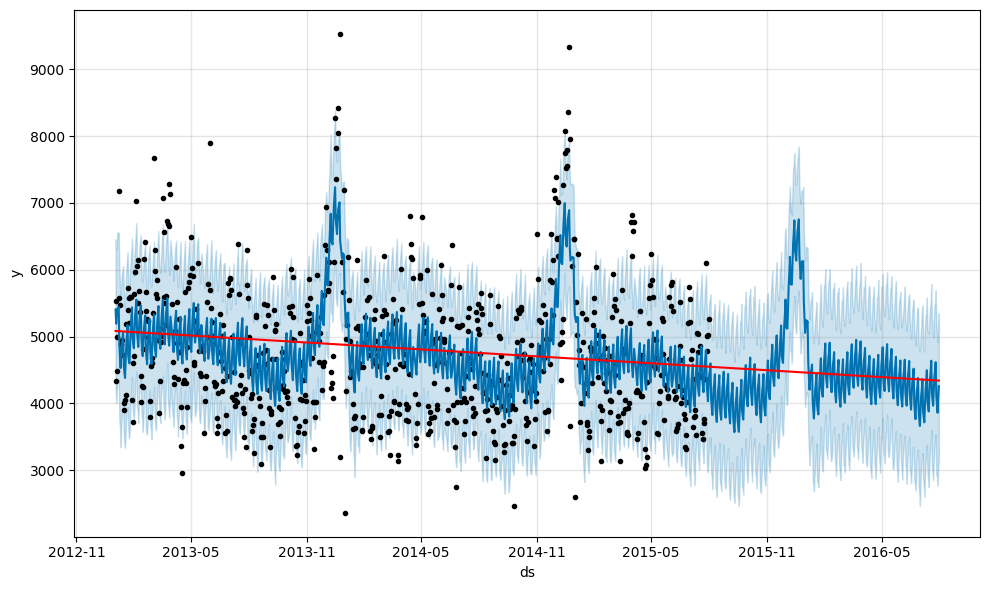

In [95]:
m2_a = Prophet(changepoint_prior_scale=0.005)
forecast2_a = m2_a.fit(df_p2).predict(future2)
fig = m2_a.plot(forecast2_a)
a = add_changepoints_to_plot(fig.gca(), m2_a, forecast2_a)